In [14]:
import pandas as pd
from gensim.utils import simple_preprocess
from gensim import corpora
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [2]:
data = pd.read_csv('fake_or_real_cleaned.csv')

In [3]:
data.text = data.text.str.replace("[^A-Za-z ]", " ")

/tmp/ipykernel_2591/1350494046.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.text = data.text.str.replace("[^A-Za-z ]", " ")


In [4]:
data.text

0       Daniel Greenfield  a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U S  Secretary of State John F  Kerry said Mon...
3         Kaydee King   KaydeeKing  November         T...
4       It s primary day in New York and front runners...
                              ...                        
6301    The State Department told the Republican Natio...
6302    The  P  in PBS Should Stand for  Plutocratic  ...
6303     Anti Trump Protesters Are Tools of the Oligar...
6304    ADDIS ABABA  Ethiopia  President Obama convene...
6305    Jeb Bush Is Suddenly Attacking Trump  Here s W...
Name: text, Length: 6306, dtype: object

In [5]:
texts = data.text.apply(simple_preprocess)

In [6]:
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in texts]

In [7]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [8]:
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [9]:
lsi_model.print_topics()

[(0,
  '0.284*"trump" + 0.203*"clinton" + 0.121*"her" + 0.120*"sanders" + 0.118*"she" + 0.091*"cruz" + 0.088*"campaign" + 0.087*"hillary" + 0.087*"obama" + 0.083*"party"'),
 (1,
  '-0.398*"dismantling" + -0.307*"obamacare" + -0.269*"killing" + -0.266*"pushing" + -0.261*"tax" + -0.254*"reform" + -0.235*"rules" + -0.220*"list" + -0.204*"administration" + 0.203*"trump"'),
 (2,
  '-0.280*"trump" + -0.242*"dismantling" + -0.203*"cruz" + -0.178*"obamacare" + -0.172*"sanders" + -0.157*"pushing" + -0.154*"reform" + -0.150*"tax" + -0.147*"rules" + -0.145*"killing"'),
 (3,
  '-0.393*"clinton" + -0.309*"fbi" + -0.240*"emails" + -0.221*"comey" + -0.218*"her" + 0.182*"cruz" + -0.175*"she" + -0.173*"sanders" + -0.167*"investigation" + -0.161*"hillary"'),
 (4,
  '-0.615*"sanders" + 0.385*"trump" + 0.177*"fbi" + -0.150*"clinton" + -0.150*"iran" + 0.145*"comey" + -0.126*"delegates" + -0.119*"bernie" + -0.116*"democratic" + 0.093*"investigation"'),
 (5,
  '-0.334*"trump" + -0.281*"russia" + -0.216*"russ

In [10]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.284434,trump,0
1,0.202721,clinton,0
2,0.120729,her,0
3,0.120422,sanders,0
4,0.117582,she,0


Topics

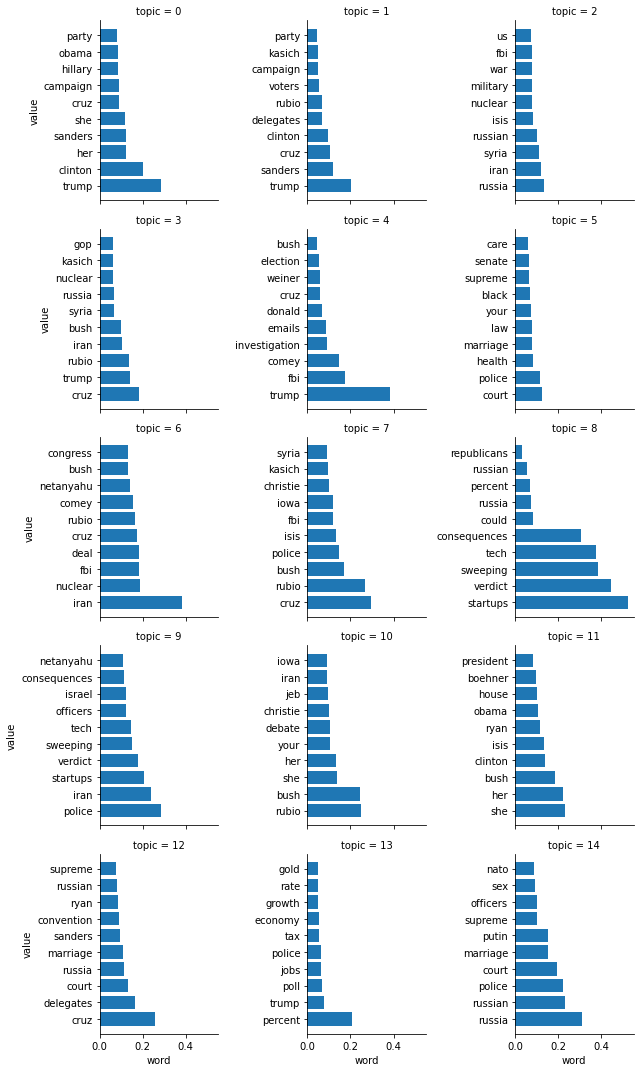

In [11]:
g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

## LDA

In [12]:
lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [16]:
lda_model.print_topics()

[(0,
  '0.004*"972" + 0.004*"219" + 0.004*"728" + 0.003*"624" + 0.003*"259" + 0.003*"1482" + 0.003*"2837" + 0.003*"422" + 0.003*"299" + 0.003*"241"'),
 (1,
  '0.014*"412" + 0.008*"193" + 0.008*"362" + 0.007*"190" + 0.006*"1627" + 0.005*"241" + 0.004*"223" + 0.004*"1748" + 0.004*"125" + 0.003*"644"'),
 (2,
  '0.021*"412" + 0.011*"78" + 0.007*"576" + 0.007*"837" + 0.006*"288" + 0.006*"891" + 0.006*"750" + 0.005*"66" + 0.005*"865" + 0.005*"911"'),
 (3,
  '0.019*"273" + 0.010*"198" + 0.010*"559" + 0.007*"78" + 0.005*"968" + 0.005*"2826" + 0.005*"2513" + 0.004*"333" + 0.004*"362" + 0.004*"1714"'),
 (4,
  '0.005*"728" + 0.005*"422" + 0.004*"223" + 0.004*"559" + 0.004*"125" + 0.004*"412" + 0.003*"461" + 0.003*"968" + 0.003*"398" + 0.003*"750"'),
 (5,
  '0.008*"728" + 0.008*"624" + 0.007*"422" + 0.004*"1482" + 0.004*"241" + 0.004*"398" + 0.003*"461" + 0.003*"213" + 0.003*"633" + 0.003*"125"'),
 (6,
  '0.009*"2157" + 0.007*"5046" + 0.006*"750" + 0.006*"219" + 0.006*"1285" + 0.005*"4038" + 0.005

In [15]:
pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
lda_viz

/home/tomas/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/home/tomas/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/tomas/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/tomas/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/tomas/anaconda3/lib/python3.9/site-packages/past/builtin

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.117036 -0.010414       1        1  14.480067
4     -0.004421 -0.023123       2        1  13.309032
11     0.062673 -0.013095       3        1  11.666756
1      0.075069 -0.051193       4        1   8.149945
6     -0.089043  0.060706       5        1   6.940460
13     0.000122  0.000072       6        1   6.652504
3      0.044236  0.048178       7        1   6.233142
12     0.078414  0.056237       8        1   6.000975
0     -0.049778 -0.044033       9        1   5.481277
5     -0.028931 -0.022678      10        1   4.464574
10    -0.074266 -0.020949      11        1   4.361947
9     -0.020086  0.077792      12        1   3.972810
8     -0.043516 -0.030208      13        1   3.933241
14    -0.047462  0.002123      14        1   2.381949
7     -0.020047 -0.029417      15        1   1.971323, topic_info=          Term          Freq         Total Category  logprob  loglift
78     clinton  18557.000000  18557.000000  Default  30.0000  30.0000
192    hillary   8074.000000   8074.000000  Default  29.0000  29.0000
412      trump  22756.000000  22756.000000  Default  28.0000  28.0000
273      obama   8270.000000   8270.000000  Default  27.0000  27.0000
190        her  11594.000000  11594.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
198      house    121.817905   5574.306007  Topic15  -6.1198   0.1031
750      state    126.077585  10062.189203  Topic15  -6.0854  -0.4532
559  president    120.847880   8732.081678  Topic15  -6.1278  -0.3538
277       only    117.326025   5631.005401  Topic15  -6.1574   0.0554
271        now    116.507932   6493.851433  Topic15  -6.1644  -0.0942

[1326 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
2354       3  0.926538        aa
2354      12  0.044121        aa
11830      5  0.936658     abadi
19603      1  0.007364  abdullah
19603      2  0.007364  abdullah
...      ...       ...       ...
14592      6  0.234352      zika
14592      7  0.006510      zika
14592      8  0.006510      zika
14592     12  0.637958      zika
14592     15  0.006510      zika

[8288 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 12, 2, 7, 14, 4, 13, 1, 6, 11, 10, 9, 15, 8])